In [26]:
# Program 1

import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Set the URL for Google News (Top Stories)
URL = "https://news.google.com/topstories?hl=en-IN&gl=IN&ceid=IN:en"

# Step 2: Send an HTTP request and get the content
response = requests.get(URL)
soup = BeautifulSoup(response.content,"html.parser")

# Step 3: Extract News Headlines
headlines = []
for item in soup.select('h3'):
    title = item.get_text()
    link_tag = item.find('a')
    if link_tag:
        link = "https://news.google.com" + link_tag['href'][1:]
    else:
        link = "No Link"
    headlines.append({"Title":title,"Link":link})

# Step 4: Store in a dataframe and show
df = pd.DataFrame(headlines)
print(df.head(10))  # Show top 10 headlines

           Title                                               Link
0    Top stories  https://news.google.com/topics/CAAqKggKIiRDQkF...
1     Local news  https://news.google.com/topics/CAAqHAgKIhZDQkl...
2  Picks for you                                            No Link


First 5 records:
    customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.7853589196872779

Confusion Matrix:
 [[920 113]
 [189 185]]

Classificaion Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



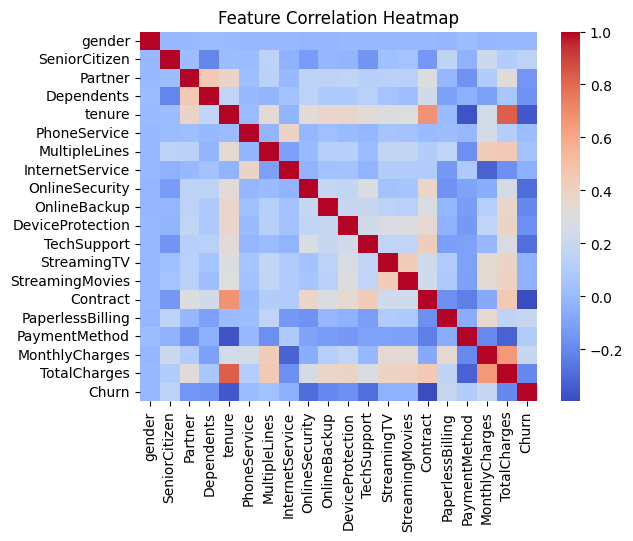

In [ ]:
# Program 2 - Customer Churn Prediction using Logistic Regression

# Step 1: Import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Step 2: Load the dataset
df = pd.read_csv("/content/drive/MyDrive/archive (7).zip")
print("First 5 records:\n",df.head(5))

# Step 3: Clean the data
# Remove customerID (not useful for prediction)
df.drop("customerID",axis = 1,inplace = True)

# Convert TotalCharges to numeric (some values are empty)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.dropna(inplace = True)  # Drop rows with missing TotalCharges

# Step 4: Encode the categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
         df[column] = le.fit_transform(df[column])

# Step 5: Feature Selection
x = df.drop("Churn",axis = 1)  # Features
y = df["Churn"]  # Target variable

# Step 6: Split the dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,\
                                                 random_state = 42)

# Step 7: Train the Model
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

# Step 8: Make predictions
y_pred = model.predict(x_test)

# Step 9: Evaluate the model
print("\nAccuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassificaion Report:\n",classification_report(y_test,y_pred))

# Step 10: Plot the correlation heatmap
sns.heatmap(df.corr(),annot = False,cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

First 5 rows:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbay

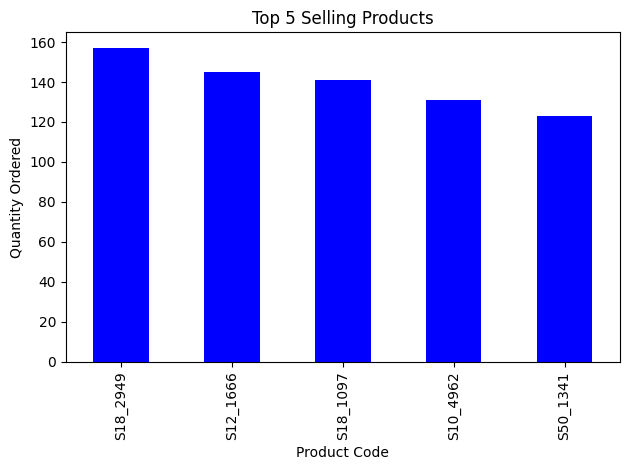

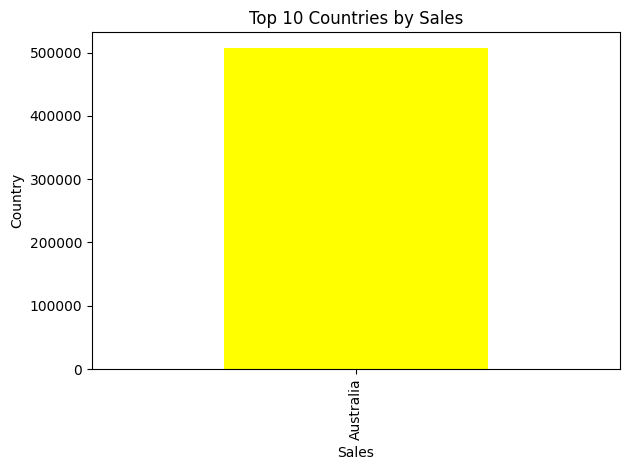

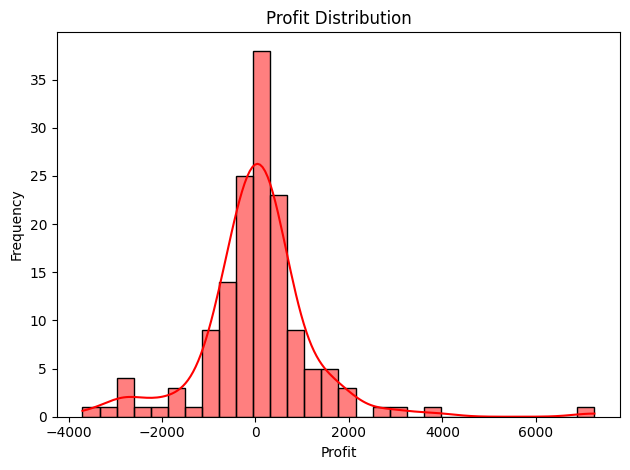

In [13]:
# Program 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('/content/drive/MyDrive/archive (8).zip',encoding = 'latin-1')
print("First 5 rows:\n",df.head(5))

# Step 2: Basic information
print("\nDataset Information:")
print(df.info())

# Step 3: Clean the data (remove nulls,duplicates)
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

# Step 4: Create a Profit Column
df["Profit"] = df["SALES"] - (df["QUANTITYORDERED"] * df["MSRP"])

# Step 5: Total Sales and Total Profit
print("\nTotal Sales:",df['SALES'].sum())
print("\nTotal Profit:",df['Profit'].sum())

# Step 6: Top 5 selling products
top_products = df.groupby('PRODUCTCODE')["QUANTITYORDERED"].sum().sort_values(ascending = False).head(5)
print("\nTop 5 Selling Products:\n",top_products)

# Step 7: Sales by Country
country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending = False)

# Step 8: Visualization

# a. Top 5 Selling Products
top_products.plot(kind = 'bar',color = 'blue')
plt.title("Top 5 Selling Products")
plt.xlabel("Product Code")
plt.ylabel("Quantity Ordered")
plt.tight_layout()
plt.show()

# b. Sales by Country (Top 10)
country_sales.head(10).plot(kind = 'bar',color = 'yellow')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# c. Profit Distribution
sns.histplot(df['Profit'],kde = True,bins = 30,color = 'red')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 33ms/step - accuracy: 0.7717 - loss: 0.6289 - val_accuracy: 0.8767 - val_loss: 0.3530
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.8884 - loss: 0.3056 - val_accuracy: 0.8967 - val_loss: 0.2892
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9041 - loss: 0.2551 - val_accuracy: 0.8999 - val_loss: 0.2692
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9227 - loss: 0.2085 - val_accuracy: 0.9045 - val_loss: 0.2611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 34ms/step - accuracy: 0.9299 - loss: 0.1885 - val_accuracy: 0.9011 - val_loss: 0.2627
313/313 - 3s - 8ms/step - accuracy: 0.9011 - loss: 0.2627
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


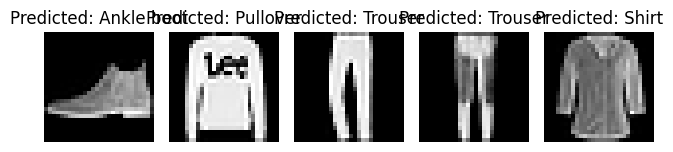

In [24]:
# Program 4 - CNN for Image Classification using Fashion MNIST

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers,models

# 1. Load the Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

# 2. Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# 3. Reshape input to add channel dimension
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# 4. Class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',\
               'Shirt','Sneaker','Bag','Ankle boot']

# 5. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

# 6. Compile the Model
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',\
              metrics = ['accuracy'])

# 7. Train the Model
model.fit(x_train,y_train,epochs = 5,validation_data = (x_test,y_test))

# 8. Evaluate the model
test_loss,test_acc = model.evaluate(x_test,y_test,verbose = 2)

# 9. Prediction
predictions = model.predict(x_test)

# Plot 5 test images with predicted labels
for i in range(5):
    plt.subplot(1,5,i + 1)
    plt.imshow(x_test[i].reshape(28,28),cmap = 'gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()